In [1]:
import pandas as pd
import os
import sys
from sklearn.preprocessing import StandardScaler
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))
from models.random_forest import random_forest
from models.random_forest import run_backtest
notebook_path = os.path.abspath(os.path.join(os.getcwd(), '../notebooks'))
input_file_path = rf'{notebook_path}\data\processed'
model_output_filepath = rf'{notebook_path}\output\model'

Training Data (Tick Numbers and Timestamps):
   tick_number            datetime
3            3 2022-01-02 22:17:00
4            4 2022-01-03 03:08:00
5            5 2022-01-03 03:49:00
6            6 2022-01-03 06:53:00
7            7 2022-01-03 08:08:00

Testing Data (Tick Numbers and Timestamps):
      tick_number            datetime
8155         8155 2022-09-27 08:54:00
8156         8156 2022-09-27 08:56:00
8157         8157 2022-09-27 08:57:00
8158         8158 2022-09-27 09:09:00
8159         8159 2022-09-27 09:22:00

Backtesting Data (Tick Numbers and Timestamps):
       tick_number            datetime    price  actual_openprice  \
10872        10872 2022-11-02 13:32:00  1.15499           1.15532   
10873        10873 2022-11-02 13:36:00  1.15599           1.15629   
10874        10874 2022-11-02 13:37:00  1.15199           1.15119   
10875        10875 2022-11-02 13:38:00  1.14999           1.14978   
10876        10876 2022-11-02 13:40:00  1.15199           1.15237   

       t

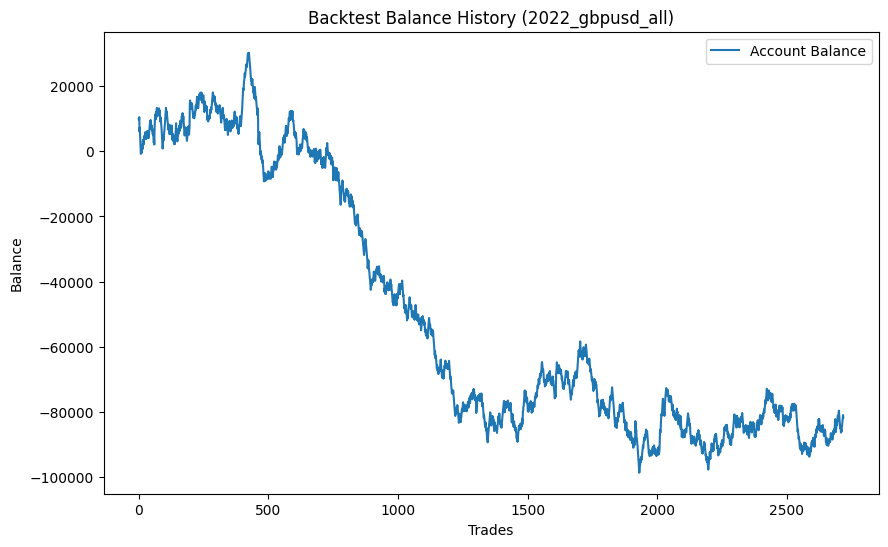

Training Data (Tick Numbers and Timestamps):
   tick_number            datetime
3            3 2022-01-03 04:07:00
4            4 2022-01-03 05:11:00
5            5 2022-01-03 06:08:00
6            6 2022-01-03 08:53:00
7            7 2022-01-03 09:27:00

Testing Data (Tick Numbers and Timestamps):
      tick_number            datetime
7434         7434 2022-09-16 03:09:00
7435         7435 2022-09-16 03:23:00
7436         7436 2022-09-16 03:47:00
7437         7437 2022-09-16 04:23:00
7438         7438 2022-09-16 05:16:00

Backtesting Data (Tick Numbers and Timestamps):
      tick_number            datetime    price  actual_openprice  ticks_moved  \
9911         9911 2022-11-14 16:20:00  139.839           139.856            1   
9912         9912 2022-11-14 17:51:00  139.939           139.940            1   
9913         9913 2022-11-14 17:58:00  140.039           140.075            1   
9914         9914 2022-11-14 18:02:00  140.139           140.148            1   
9915         9915 

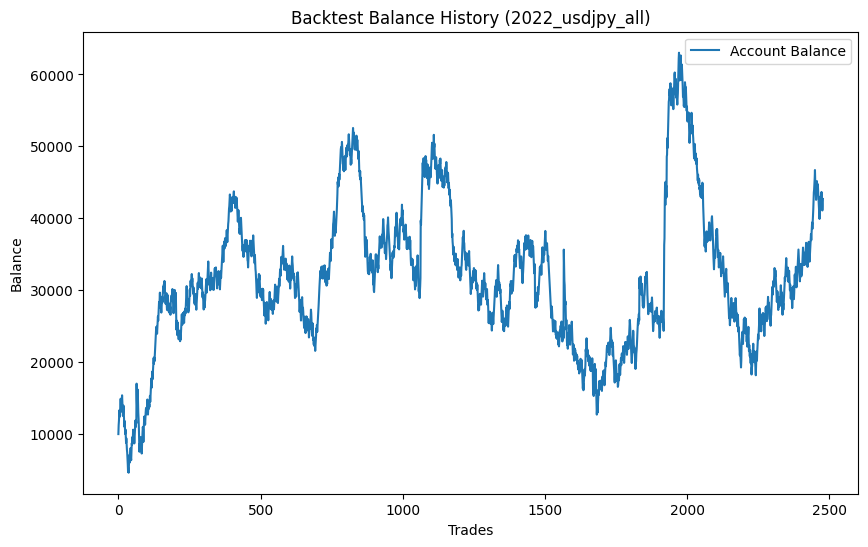

Training Data (Tick Numbers and Timestamps):
   tick_number            datetime
3            3 2022-01-03 04:11:00
4            4 2022-01-03 04:30:00
5            5 2022-01-03 04:38:00
6            6 2022-01-03 06:16:00
7            7 2022-01-03 07:34:00

Testing Data (Tick Numbers and Timestamps):
      tick_number            datetime
4975         4975 2022-09-02 08:31:00
4976         4976 2022-09-02 08:41:00
4977         4977 2022-09-02 08:45:00
4978         4978 2022-09-02 09:00:00
4979         4979 2022-09-02 09:32:00

Backtesting Data (Tick Numbers and Timestamps):
      tick_number            datetime   price  actual_openprice  ticks_moved  \
6632         6632 2022-10-27 08:27:00  0.9999           0.99956            1   
6633         6633 2022-10-27 08:29:00  0.9989           0.99882            1   
6634         6634 2022-10-27 08:31:00  0.9999           1.00043            1   
6635         6635 2022-10-27 08:32:00  1.0009           1.00129            1   
6636         6636 2022-

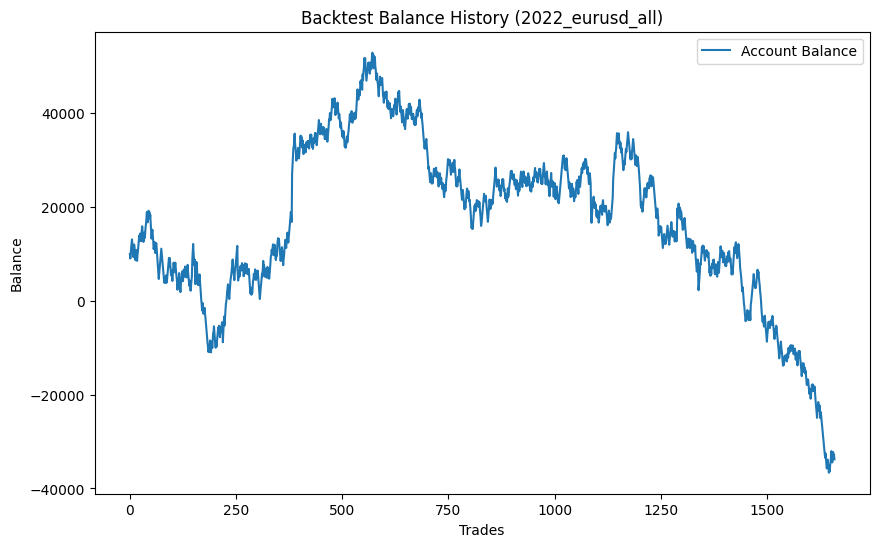

Training Data (Tick Numbers and Timestamps):
   tick_number            datetime
3            3 2022-01-03 08:25:00
4            4 2022-01-03 09:36:00
5            5 2022-01-03 11:28:00
6            6 2022-01-03 11:52:00
7            7 2022-01-03 12:17:00

Testing Data (Tick Numbers and Timestamps):
      tick_number            datetime
2514         2514 2022-09-26 13:41:00
2515         2515 2022-09-26 13:43:00
2516         2516 2022-09-26 13:50:00
2517         2517 2022-09-26 13:57:00
2518         2518 2022-09-26 14:09:00

Backtesting Data (Tick Numbers and Timestamps):
      tick_number            datetime    price  actual_openprice  ticks_moved  \
3351         3351 2022-10-24 09:27:00  0.87137           0.87145            1   
3352         3352 2022-10-24 09:53:00  0.87237           0.87249            1   
3353         3353 2022-10-24 10:10:00  0.87337           0.87369            1   
3354         3354 2022-10-24 11:09:00  0.87437           0.87437            1   
3355         3355 

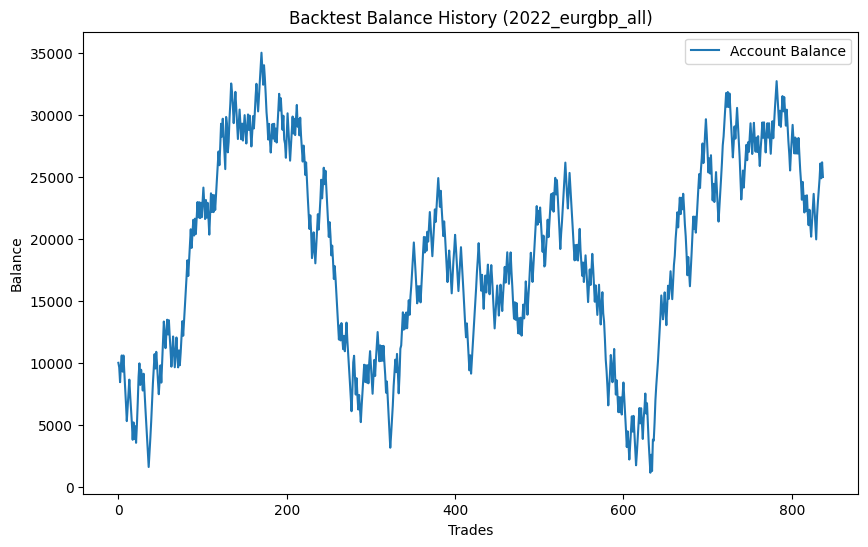

In [9]:
year = "2022"
ccys = ["gbpusd", "usdjpy", "eurusd", "eurgbp"]
session = 'all'

for ccy in ccys:
    file_path = rf'{input_file_path}/{year}_{ccy}_tick_first_price_as_base.csv'
    # Load the dataset
    df = pd.read_csv(file_path)
    backtest_data, X_backtest, y_backtest, y_pred_backtest = random_forest(df, year, ccy, model_output_filepath)
    balance_history, trade_log = run_backtest(model_output_filepath, year, ccy, session, backtest_data, X_backtest, y_backtest, y_pred_backtest)